# Importing Libraries

In [2]:
#!pip install numpy

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Data cleaning

In [4]:
google = pd.read_csv('/kaggle/input/google-stock-price/GOOG.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [6]:
google['Date'] = pd.to_datetime(google['Date'])

In [7]:
print(f'Datefrome contains stock prices between {google.Date.min()} {google.Date.max()}')
print(f'Total days = {(google.Date.max()-google.Date.min()).days} days')

Datefrome contains stock prices between 2004-08-19 00:00:00 2023-12-05 00:00:00
Total days = 7047 days


In [8]:
google.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4858,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,2014-04-12 02:30:17.044051200,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
min,2004-08-19 00:00:00,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,2009-06-16 06:00:00,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,2014-04-12 12:00:00,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,2019-02-07 18:00:00,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,2023-12-05 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09
std,NaN,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08


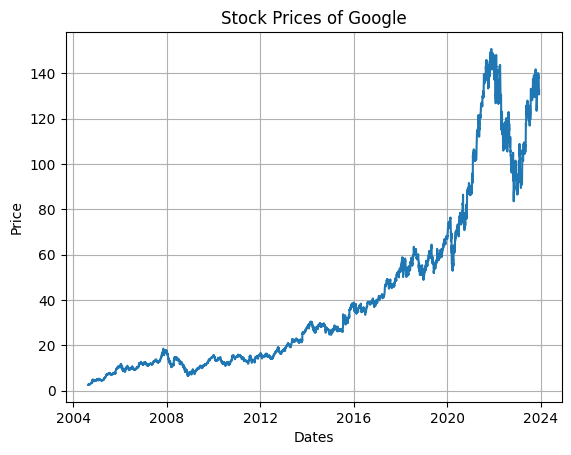

In [9]:
plt.plot(google['Date'],google['Close'])
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Stock Prices of Google')
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
x = np.array(google.index).reshape(-1,1)
y = google['Close']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [12]:
scaler = StandardScaler().fit(x_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

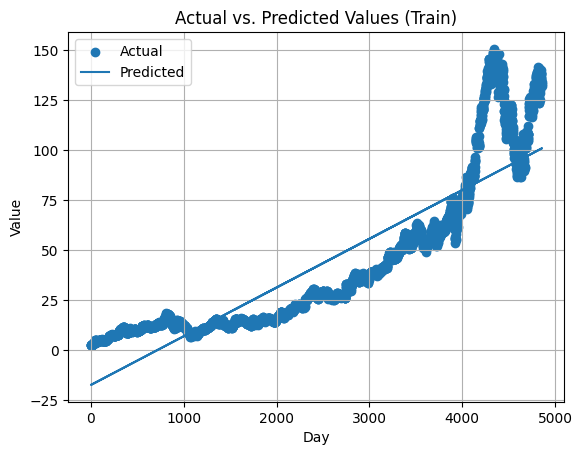

In [22]:
# Assuming x_train is a 2D array or DataFrame and Y_train is a 1D array or Series
plt.scatter(x_train[:, 0], y_train, label='Actual', marker='o')  # Plot actual values
plt.plot(x_train[:, 0], lm.predict(x_train).T, label='Predicted')  # Plot predicted values

plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values (Train)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
#calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,lm.predict(x_train))}\t{r2_score(y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train,lm.predict(x_train))}\t{mse(y_test,lm.predict(x_test))}'''
print(scores)


Metric           Train                Test        
r2_score  0.7769716098371854	0.7675221972985163
MSE       338.4133736863397	331.4197278971651
